In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.animation import FuncAnimation
import time
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd
from graphics import *
import sys
import random
import math

In [6]:
def plot(func, m1, x0, y0, vx0, vy0, Δt, tf):
    """
    This function plots the entirety of the data.
    
    INPUTS:
    func: The function to acquire the data from.
    m1  : The mass of the fixed point mass. (kg)
    x0  : The initial x-position of the free body. (m)
    y0  : The initial y-position of the free body. (m)
    vx0 : The initial x-velocity of the free body. (m/s)
    vy0 : The initial y-velocity of the free body. (m/s)
    Δt  : The time increment between data points. (s)
    tf  : The total amount of time processed. (s)
    
    RETURNS:
    None. Plots positional data.
    """
    
    x,y,Δt,t,r = func(m1, x0, y0, vx0, vy0, Δt, tf)
    
    fig7, axe7 = plt.subplots()
    axe7.plot(t, r, "RED")
    axe7.set_title("t, r")
    
    fig, axe = plt.subplots()
    axe.plot(x, y, "RED")
    axe.set_title("x, y")
    plt.axis('equal')
    plt.axhline(0, 0, 1)
    plt.axvline(0, 0, 1)

In [7]:
def play(func, m1, x0, y0, vx0, vy0, Δt, tf, interval, inc):
    """
    This function animates the motion of an object from data sets.
    
    INPUTS:
    func    : The function to acquire the data from.
    m1      : The mass of the fixed point mass. (kg)
    x0      : The initial x-position of the free body. (m)
    y0      : The initial y-position of the free body. (m)
    vx0     : The initial x-velocity of the free body. (m/s)
    vy0     : The initial y-velocity of the free body. (m/s)
    Δt      : The time increment between data points. (s)
    tf      : The total amount of time processed. (s)
    interval: The amount of time between each frame (redundant if very small). (s)
    inc     : The amount of data point skipped each frame. More effective at adjusting the speed of the animation.
    
    RETURNS:
    None. Creates a graphics window animation of motion data.
    """
    
    x,y,Δt,t,r = func(m1, x0, y0, vx0, vy0, Δt, tf)

    WindowSize = 800
    WindowOffset = 30
    MarkerSize = .5
    windowWidth = WindowSize + WindowOffset * 2
    windowHeight = WindowSize + WindowOffset * 2
    windowTitle = "Orbital Trajectory Plot"
    win = GraphWin(windowTitle, windowWidth, windowHeight)#create the top left and bottom right points for this rectangle
    win.setBackground("White")
    topLeftPoint = Point(WindowOffset, WindowOffset)
    bottomRightPoint = Point(WindowSize + WindowOffset, WindowSize + WindowOffset)

    r = Rectangle(topLeftPoint, bottomRightPoint)    # instantiate a Rectangle object

    r.draw(win)         # draw the object to the window
    win.setBackground("black")

    xCoord = ( WindowSize / 2 ) + WindowOffset
    yCoord = ( WindowSize / 2 ) + WindowOffset
    p = Point(xCoord, yCoord)
    
    
    if (max(x) > min(x)):
        maxim = max(x)
    else:
        maxim = min(x)
    if (max(y) > maxim):
        maxim = max(y)
    if (min(y) > maxim):
        maxim = min(y)
    
    
    i = 0

    while  win.checkKey() == "":
        
        if (i == 0):
            sun = Circle( Point((1/2)*WindowSize + WindowOffset, (1/2)*WindowSize + WindowOffset), 2)
            sun.setFill("red")
            sun.setOutline("red")
            sun.draw(win)
        
        xpt1 = (x[i]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        ypt1 = (y[i]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        
        xpt2 = (x[i+inc]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        ypt2 = (y[i+inc]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        
        if (i>0):
            pt.undraw()
        
        point1 = Point(xpt1, ypt1)
        point2 = Point(xpt2, ypt2)
        c = Line(point1, point2)
        c.setFill("blue")
        c.draw(win)
        
        d = c
        
        pt = Circle( Point(xpt2, ypt2), 2 )
        pt.setFill("yellow")
        pt.draw(win)
        
        i = i + inc

        key_num = random.SystemRandom(i)
        
        time.sleep(interval)
        
    while  win.checkKey() == "":
        pass

    win.close()         # Close window when done

In [8]:
def move(obj, Δt):
    
    G = 6.67408*(10**-11) #Gravitational constant
    
    num = len(obj) #Number of objects
    
    ############ create lists ############
    
    m = []
    x = []
    y = []
    vx = []
    vy = []
    for i in range(num):
        m.append(obj[i][0])
        x.append(obj[i][1])
        y.append(obj[i][2])
        vx.append(obj[i][3])
        vy.append(obj[i][4])
        
    ax = [0] * num
    ay = [0] * num
    
    ############ define "k" lists ############
    
    k1x = []
    k1y = []
    k1vx = []
    k1vy = []
    k2x = []
    k2y = []
    
    ############ determine k1 ############
    
    for i in range(num):
        
        for g in range(num):
            if (g != i):
                r = math.sqrt( (x[i]-x[g])**2 + (y[i]-y[g])**2 )
                ax[i] = ax[i] + ((x[i]-x[g])*(-1)*G*m[g]/(r**3))
                ay[i] = ay[i] + ((y[i]-y[g])*(-1)*G*m[g]/(r**3))
        
        
        
        k1x.append(vx[i]*Δt + (1/2)*ax[i]*(Δt**2))
        k1y.append(vy[i]*Δt + (1/2)*ay[i]*(Δt**2))
        
        k1vx.append(ax[i]*Δt)
        k1vy.append(ay[i]*Δt)
        
    ############ determine k2 ############
        
    for i in range(num):
        
        newx = x[i] + k1x[i]
        newy = y[i] + k1y[i]
        newax = 0
        neway = 0
        
        for g in range(num):
            if (g != i):
                r = math.sqrt( (newx - (x[g]+k1x[g]))**2 + (newy - (y[g]+k1y[g]))**2 )
                newax = newax + ((newx - (x[g]+k1x[g]))*(-1)*G*m[g]/(r**3))
                neway = neway + ((newy - (y[g]+k1y[g]))*(-1)*G*m[g]/(r**3))
        
        newvx = vx[i] + k1vx[i]
        newvy = vy[i] + k1vy[i]
        
        #k2vx.append(newax*Δt)
        #k2vy.append(neway*Δt)
        
        k2x.append(newvx*Δt + (1/2)*newax*(Δt**2))
        k2y.append(newvy*Δt + (1/2)*neway*(Δt**2))
        
    ############ adjust lists ############
        
    for i in range(num):
        
        x[i] = x[i] + 0.5*(k1x[i] + k2x[i])
        y[i] = y[i] + 0.5*(k1y[i] + k2y[i])
        
        vx[i] = vx[i] + 1*(k1vx[i])
        vy[i] = vy[i] + 1*(k1vy[i])
    
    ############ create new object list ############
    
    newobj = []
    for i in range(num):
        newobj.append(   [ m[i], x[i], y[i], vx[i], vy[i] ]   )
        
    ############ return new object list ############
        
    return newobj

In [17]:
def simulate(move, obj, Δt, mindt, tf, tftype):
    
    G = 6.67408*(10**-11) #Gravitational constant
    
    num = len(obj) #Number of objects
    
    ############ determine time ############
    
    if (tftype == "year"):
        tf = tf*3.15576e7
    elif (tftype == "day"):
        tf = tf*86400
    elif (tftype == "hour"):
          tf = tf*360  
    elif (tftype == "minute"):
        tf = tf*60
    elif (tftype != "second"):
        print("Assuming tf is in seconds")
        
    ############ define variables ############
    
    newobj = obj.copy()
    
    time = [0]
    
    m = []
    x = []
    y = []
    vx = []
    vy = []
    for i in range(num):
        x.append([])
        y.append([])
        vx.append([])
        vy.append([])
    for i in range(num):
        m.append(obj[i][0])
        x[i].append(obj[i][1])
        y[i].append(obj[i][2])
        vx[i].append(obj[i][3])
        vy[i].append(obj[i][4])
        
    ############ determine initial minimum radius ############
    
    r0 = float("inf")
    
    for i in range(num):
            
        for g in range(num-i-1):
                
            testr = math.sqrt((x[i][0]-x[g+i+1][0])**2 + (y[i][0]-y[g+i+1][0])**2)
                
            if (testr < r0):
                r0 = testr
    
    ############ iterate ############
    
    i = 1
    
    while (time[-1] < tf):
        
        if (i%10000 == 0):
            print(str(round(time[-1], 0)/round(tf, 0)), end='\r', flush=True)
        
        ###### determine time increment from smallest radius ######
        
        minr = float("inf")
        
        if (time[-1] > 0): #
            
            for g in range(num):
                for k in range(num-g-1):
                    r = math.sqrt((x[g][-1]-x[k+g+1][-1])**2 + (y[g][-1]-y[k+g+1][-1])**2)
                    
                    if (r < minr):
                        minr = r
            
            if (minr < r0): ##
                dt = Δt - Δt*(minr/r0)**2
                if (dt < mindt):
                    dt = mindt
                    
            else: ##
                dt = Δt
                
        else: #
            dt = Δt
            
        ###### run ######
        
        newobj = move(newobj, dt)
        
        for g in range(num):
            x[g].append(newobj[g][1])
            y[g].append(newobj[g][2])
            vx[g].append(newobj[g][3])
            vy[g].append(newobj[g][4])
            
        time.append(time[-1] + dt)
        
        i = i + 1
        
    ############ return ############
    
    return [x,y,vx,vy,time]

In [18]:
def plotsim(data):
    
    fig, axe = plt.subplots()

    for i in range(len(data[0])):
        if (i == 0):
            color = "RED"
        elif (i == 1):
            color = "BLUE"
        elif (i == 2):
            color = "GREEN"
        elif (i == 3):
            color = "YELLOW"
        elif (i == 4):
            color = "ORANGE"
        elif (i == 5):
            color = "BLACK"
        elif (i == 6):
            color = "PURPLE"
        else:
            color = "BLACK"
        axe.plot(data[0][i], data[1][i], color)

    plt.axis('equal')
    
    return None

In [19]:
solarsystem = [
    [1.989e30, 0, 0, 0, 0], #SUN
    [5.97e24, 152.1e9, 0, 0, 29.29e3], #EARTH
    [0.33011e24, 0, 69.82e9, -38.86e3, 0], #MERCURY
    [4.8675e24, 0, -108.94e9, 34.79e3, 0], #VENUS
    [0.64171e24, -249.23e9, 0, 0, -21.97e3], #MARS
    [898.19e24, 0, -816.62e9, 12.44e3, 0], #JUPITER
    [568.34e24, 0, 1514.50e9, -9.09e3, 0], #SATURN
    [86.813e24, -3003.62e9, 0, 0, -6.49e3], #URANUS
    [102.413e24, 0, -4545.67e9, 5.37e3, 0] #NEPTUNE
]

sunearthmoon =[
    [1.989e30, 0, 0, 0, 0], #SUN
    [5.97e24, 152.1e9, 0, 0, 29.29e3], #EARTH
    [0.07346e24, (152.1e9)+(0.4055e9), 0, 0, (29.29e3)+(0.970e3)], #MOON
]

earthmoon = [
    [5.97e24, 0, 0, 0, 0], #EARTH
    [0.07346e24, 0.4055e9, 0, 0, 0.970e3] #MOON
]

posmass = [100e24, 1e9, 0, 0, -2e3]
negmass = [-100e24, 0, 0, 0, -2e3]

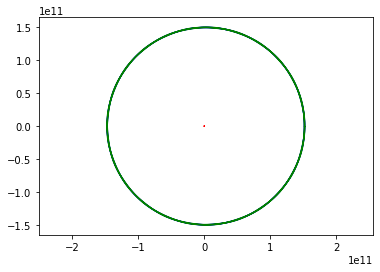

In [20]:
obj = sunearthmoon

data = simulate(move, obj, 1000, 100, 2, "year")

#print(data[0])

plotsim(data)

#fig2, axe2 = plt.subplots()
#axe2.plot(data[0][0], data[1][0], "RED")

#fig3, axe3 = plt.subplots()
#axe3.plot(data[0][1], data[1][1], "blue")

#fig4, axe4 = plt.subplots()
#axe4.plot(data[0][2], data[1][2], "green")

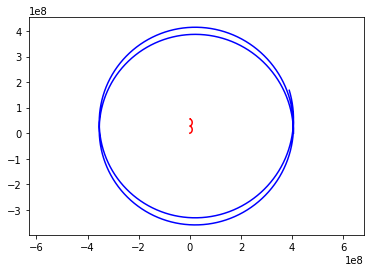

In [21]:
obj = earthmoon

data = simulate(move, obj, 100, 1, 56, "day")

#print(data[0])

plotsim(data)

#fig2, axe2 = plt.subplots()
#axe2.plot(data[0][0], data[1][0], "blue")

#fig3, axe3 = plt.subplots()
#axe3.plot(data[0][1], data[1][1], "green")

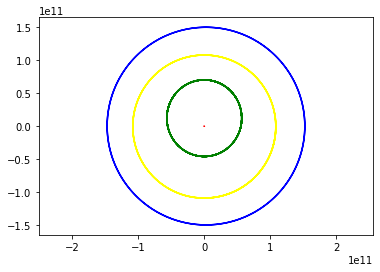

In [22]:
obj = solarsystem[0:4]

data = simulate(move, obj, 1000, 100, 2, "year")

#print(data[0])

plotsim(data)

#fig2, axe2 = plt.subplots()
#axe2.plot(data[0][0], data[1][0], "RED")

#fig3, axe3 = plt.subplots()
#axe3.plot(data[0][1], data[1][1], "blue")

#fig4, axe4 = plt.subplots()
#axe4.plot(data[0][2], data[1][2], "green")

#fig5, axe5 = plt.subplots()
#axe5.plot(data[0][3], data[1][3], "yellow")

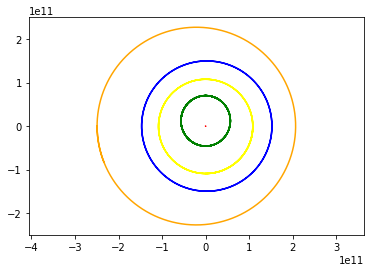

In [23]:
obj = solarsystem[0:5]

data = simulate(move, obj, 1000, 100, 2, "year")

#print(data[0])

plotsim(data)

#fig2, axe2 = plt.subplots()
#axe2.plot(data[0][0], data[1][0], "RED")

#fig3, axe3 = plt.subplots()
#axe3.plot(data[0][1], data[1][1], "blue")

#fig4, axe4 = plt.subplots()
#axe4.plot(data[0][2], data[1][2], "green")

#fig5, axe5 = plt.subplots()
#axe5.plot(data[0][3], data[1][3], "yellow")

In [ ]:
obj = solarsystem

data = simulate(move, obj, 2000, 1, 150, "year")

#print(data[0])

plotsim(data)

#fig2, axe2 = plt.subplots()
#axe2.plot(data[0][0], data[1][0], "RED")

#fig3, axe3 = plt.subplots()
#axe3.plot(data[0][1], data[1][1], "blue")

#fig4, axe4 = plt.subplots()
#axe4.plot(data[0][2], data[1][2], "green")

#fig5, axe5 = plt.subplots()
#axe5.plot(data[0][3], data[1][3], "yellow")



#fig6, axe6 = plt.subplots()
#fig2, axe2 = plt.subplots()
#axe6.plot(data[0][0], data[1][0], "RED")
#axe6.plot(data[0][1], data[1][1], "blue")
#axe6.plot(data[0][2], data[1][2], "green")
#axe6.plot(data[0][3], data[1][3], "yellow")
#plt.axis('equal')

In [ ]:
fig6, axe6 = plt.subplots()
axe6.plot(data[0][0], data[1][0], "RED")
axe6.plot(data[0][1], data[1][1], "blue")
axe6.plot(data[0][2], data[1][2], "green")
axe6.plot(data[0][3], data[1][3], "yellow")
axe6.plot(data[0][4], data[1][4], "black")
plt.axis('equal')

fig2, axe2 = plt.subplots()
axe2.plot(data[0][0], data[1][0], "RED")

In [ ]:
obj = [posmass, negmass]

data = simulate(move, obj, 100, 1, 10, "day")

#print(data[0])

plotsim(data)

fig2, axe2 = plt.subplots()
axe2.plot(data[2][0], data[4], "RED")
fig3, axe3 = plt.subplots()
axe3.plot(data[2][1], data[4], "BLUE")